In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Load dataset
file_path = "iot_device_train.csv"
df = pd.read_csv(file_path)

In [3]:
# Display basic info
display(df.head())
display(df.info())

,ack,ack_A,ack_B,bytes,bytes_A,bytes_A_B_ratio,bytes_B,ds_field_A,ds_field_B,duration,...,suffix_is_co.il,suffix_is_com,suffix_is_com.sg,suffix_is_else,suffix_is_empty_char_value,suffix_is_googleapis.com,suffix_is_net,suffix_is_org,suffix_is_unresolved,device_category
0,9,5,5,1213,743,0.713924,668,0,0,1.5756,...,0,0,0,1,0,0,0,0,0,security_camera
1,9,5,5,1213,743,1.806874,668,0,0,0.6890,...,0,0,0,1,0,0,0,0,0,security_camera
2,9,5,5,1213,743,0.103124,668,0,0,0.9852,...,0,0,0,1,0,0,0,0,0,security_camera
3,9,5,5,1213,743,1.806874,668,0,0,1.5756,...,0,0,0,1,0,0,0,0,0,security_camera
4,9,5,5,1213,743,1.806874,668,0,0,1.5756,...,0,0,0,1,0,0,0,0,0,security_camera


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 298 entries, ack to device_category
dtypes: float64(80), int64(217), object(1)
memory usage: 2.3+ MB


None

In [4]:
# Encode target labels
label_encoder = LabelEncoder()
df['device_category'] = label_encoder.fit_transform(df['device_category'])

In [5]:
# Split dataset into features and labels
X = df.drop(columns=['device_category'])
y = df['device_category']


In [6]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
# Reshape for CNN (assuming 1D time-series like data)
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)

In [9]:
# Define CNN Model
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(label_encoder.classes_), activation='softmax')
])

In [10]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=32)

Epoch 1/50


25/25 [==============================] - 2s 30ms/step - loss: 1.6087 - accuracy: 0.4025 - val_loss: 1.2019 - val_accuracy: 0.6050
Epoch 2/50
25/25 [==============================] - 0s 15ms/step - loss: 1.0914 - accuracy: 0.5913 - val_loss: 0.7721 - val_accuracy: 0.7150
Epoch 3/50
25/25 [==============================] - 0s 15ms/step - loss: 0.8021 - accuracy: 0.6938 - val_loss: 0.6675 - val_accuracy: 0.7700
Epoch 4/50
25/25 [==============================] - 0s 15ms/step - loss: 0.7017 - accuracy: 0.7412 - val_loss: 0.5689 - val_accuracy: 0.8050
Epoch 5/50
25/25 [==============================] - 0s 17ms/step - loss: 0.5936 - accuracy: 0.7563 - val_loss: 0.5428 - val_accuracy: 0.7900
Epoch 6/50
25/25 [==============================] - 0s 16ms/step - loss: 0.5386 - accuracy: 0.7525 - val_loss: 0.5266 - val_accuracy: 0.8050
Epoch 7/50
25/25 [==============================] - 0s 14ms/step - loss: 0.5198 - accuracy: 0.7663 - val_loss: 0.5577 - val_accuracy: 0.7850
Epoch 8/50


In [12]:
# Evaluate the model
y_pred = np.argmax(model.predict(X_test), axis=1)
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

7/7 [==============================] - 0s 6ms/step
                 precision    recall  f1-score   support

             TV       0.80      0.92      0.86        13
   baby_monitor       0.96      1.00      0.98        25
         lights       0.45      0.96      0.61        23
  motion_sensor       1.00      0.92      0.96        13
security_camera       1.00      1.00      1.00        20
 smoke_detector       1.00      0.96      0.98        27
         socket       0.60      0.14      0.23        21
     thermostat       0.94      0.81      0.87        21
          watch       0.91      0.95      0.93        22
   water_sensor       1.00      0.40      0.57        15

       accuracy                           0.82       200
      macro avg       0.87      0.81      0.80       200
   weighted avg       0.86      0.82      0.80       200



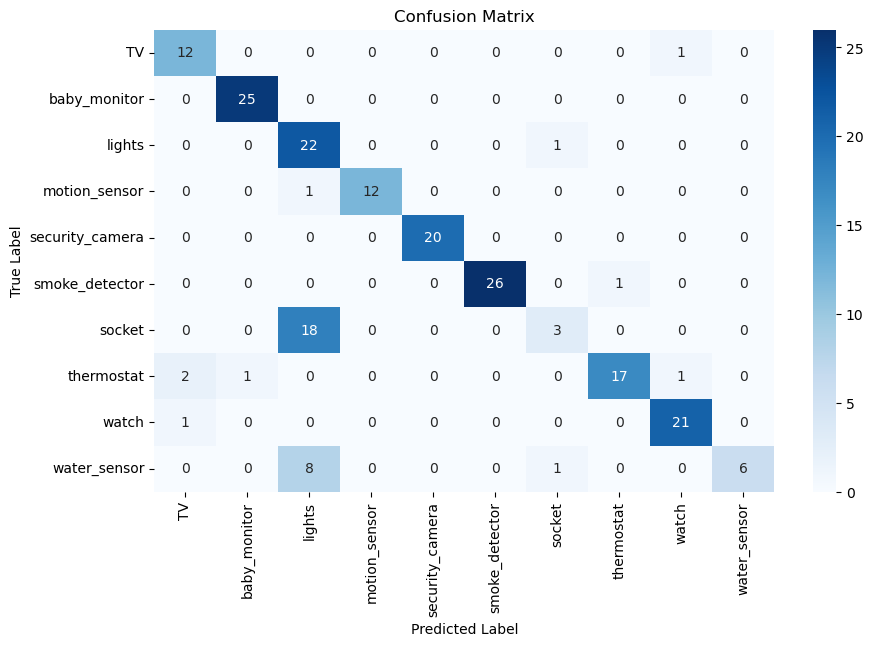

In [13]:
# Confusion Matrix
plt.figure(figsize=(10, 6))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


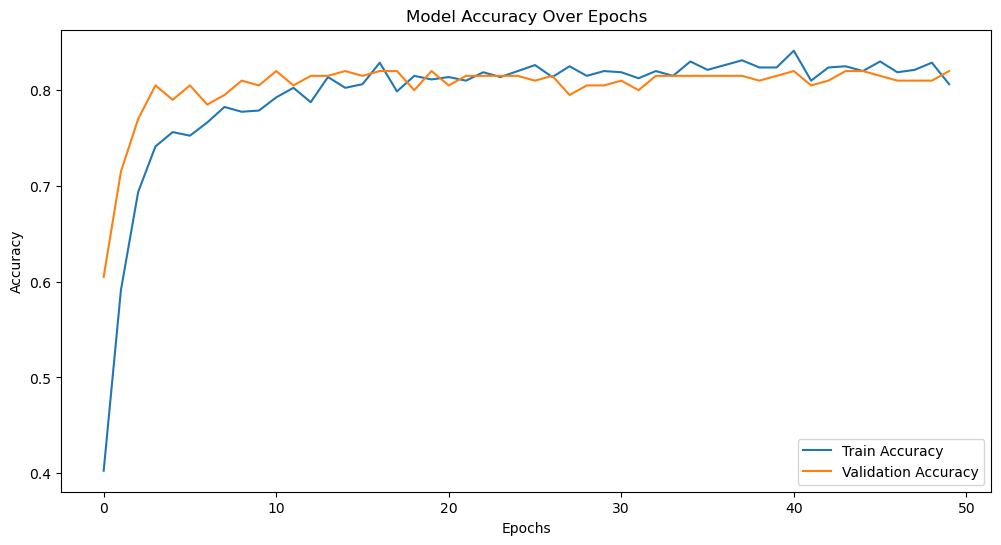

In [14]:
# Training history visualization
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy Over Epochs')
plt.show()

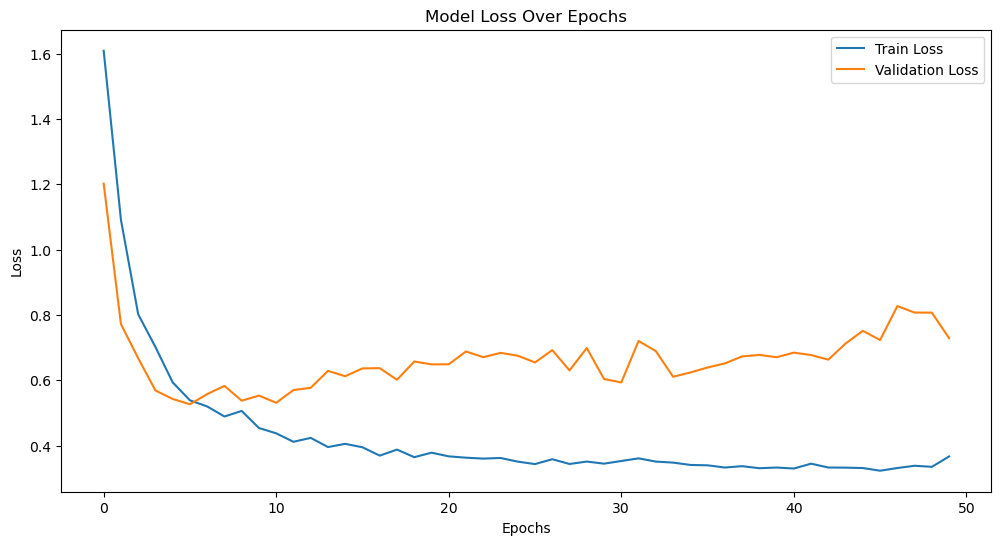

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss Over Epochs')
plt.show()

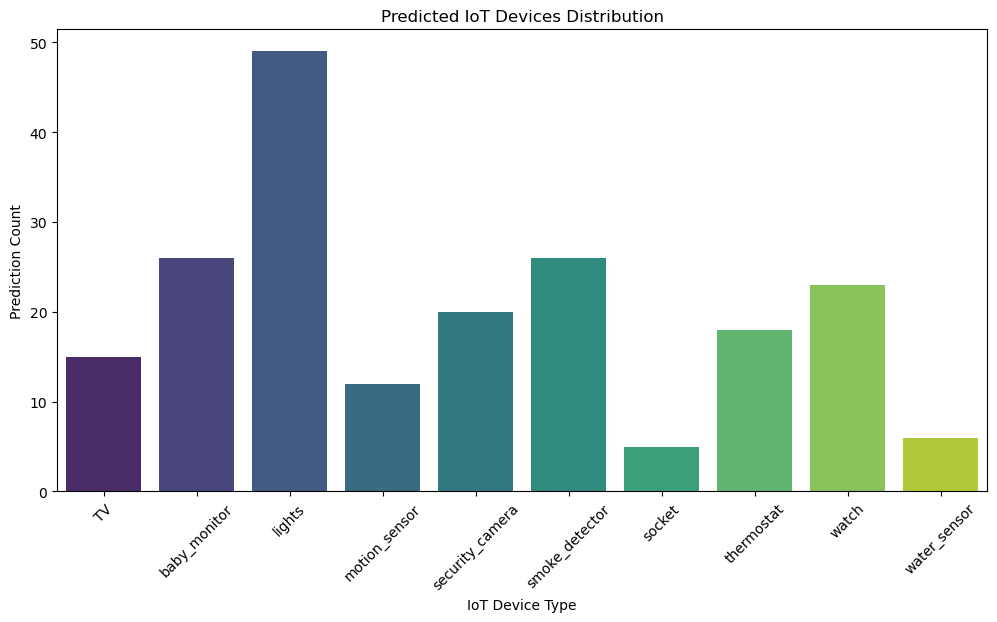

In [16]:
# Bar Graph of Predicted IoT Devices
unique, counts = np.unique(y_pred, return_counts=True)
plt.figure(figsize=(12, 6))
sns.barplot(x=label_encoder.inverse_transform(unique), y=counts, palette='viridis')
plt.xticks(rotation=45)
plt.xlabel("IoT Device Type")
plt.ylabel("Prediction Count")
plt.title("Predicted IoT Devices Distribution")
plt.show()